In [1]:
import matplotlib.pyplot as plt
import numpy as num
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


#first read csv file

bike = pd.read_csv('day.csv')
#check to see if data loaded
bike.head()
#it did

#check data shape
bike.shape
#gave (730, 16) which corresponds with dataset

#check data info for any columns or variables with lots of null values in it to exclude from data analysis
bike.info()

#gave no columns with excessive null values, all columns have 730 non-null values

#give command for data to give a general summary 
bike.describe()
#we see the highest amount of bike rentals across casual and registered users was 8714 and lowest was 22

bike.columns

#need to drop instant cause it's an index, dteday cause it's given by year and month
bike=bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1

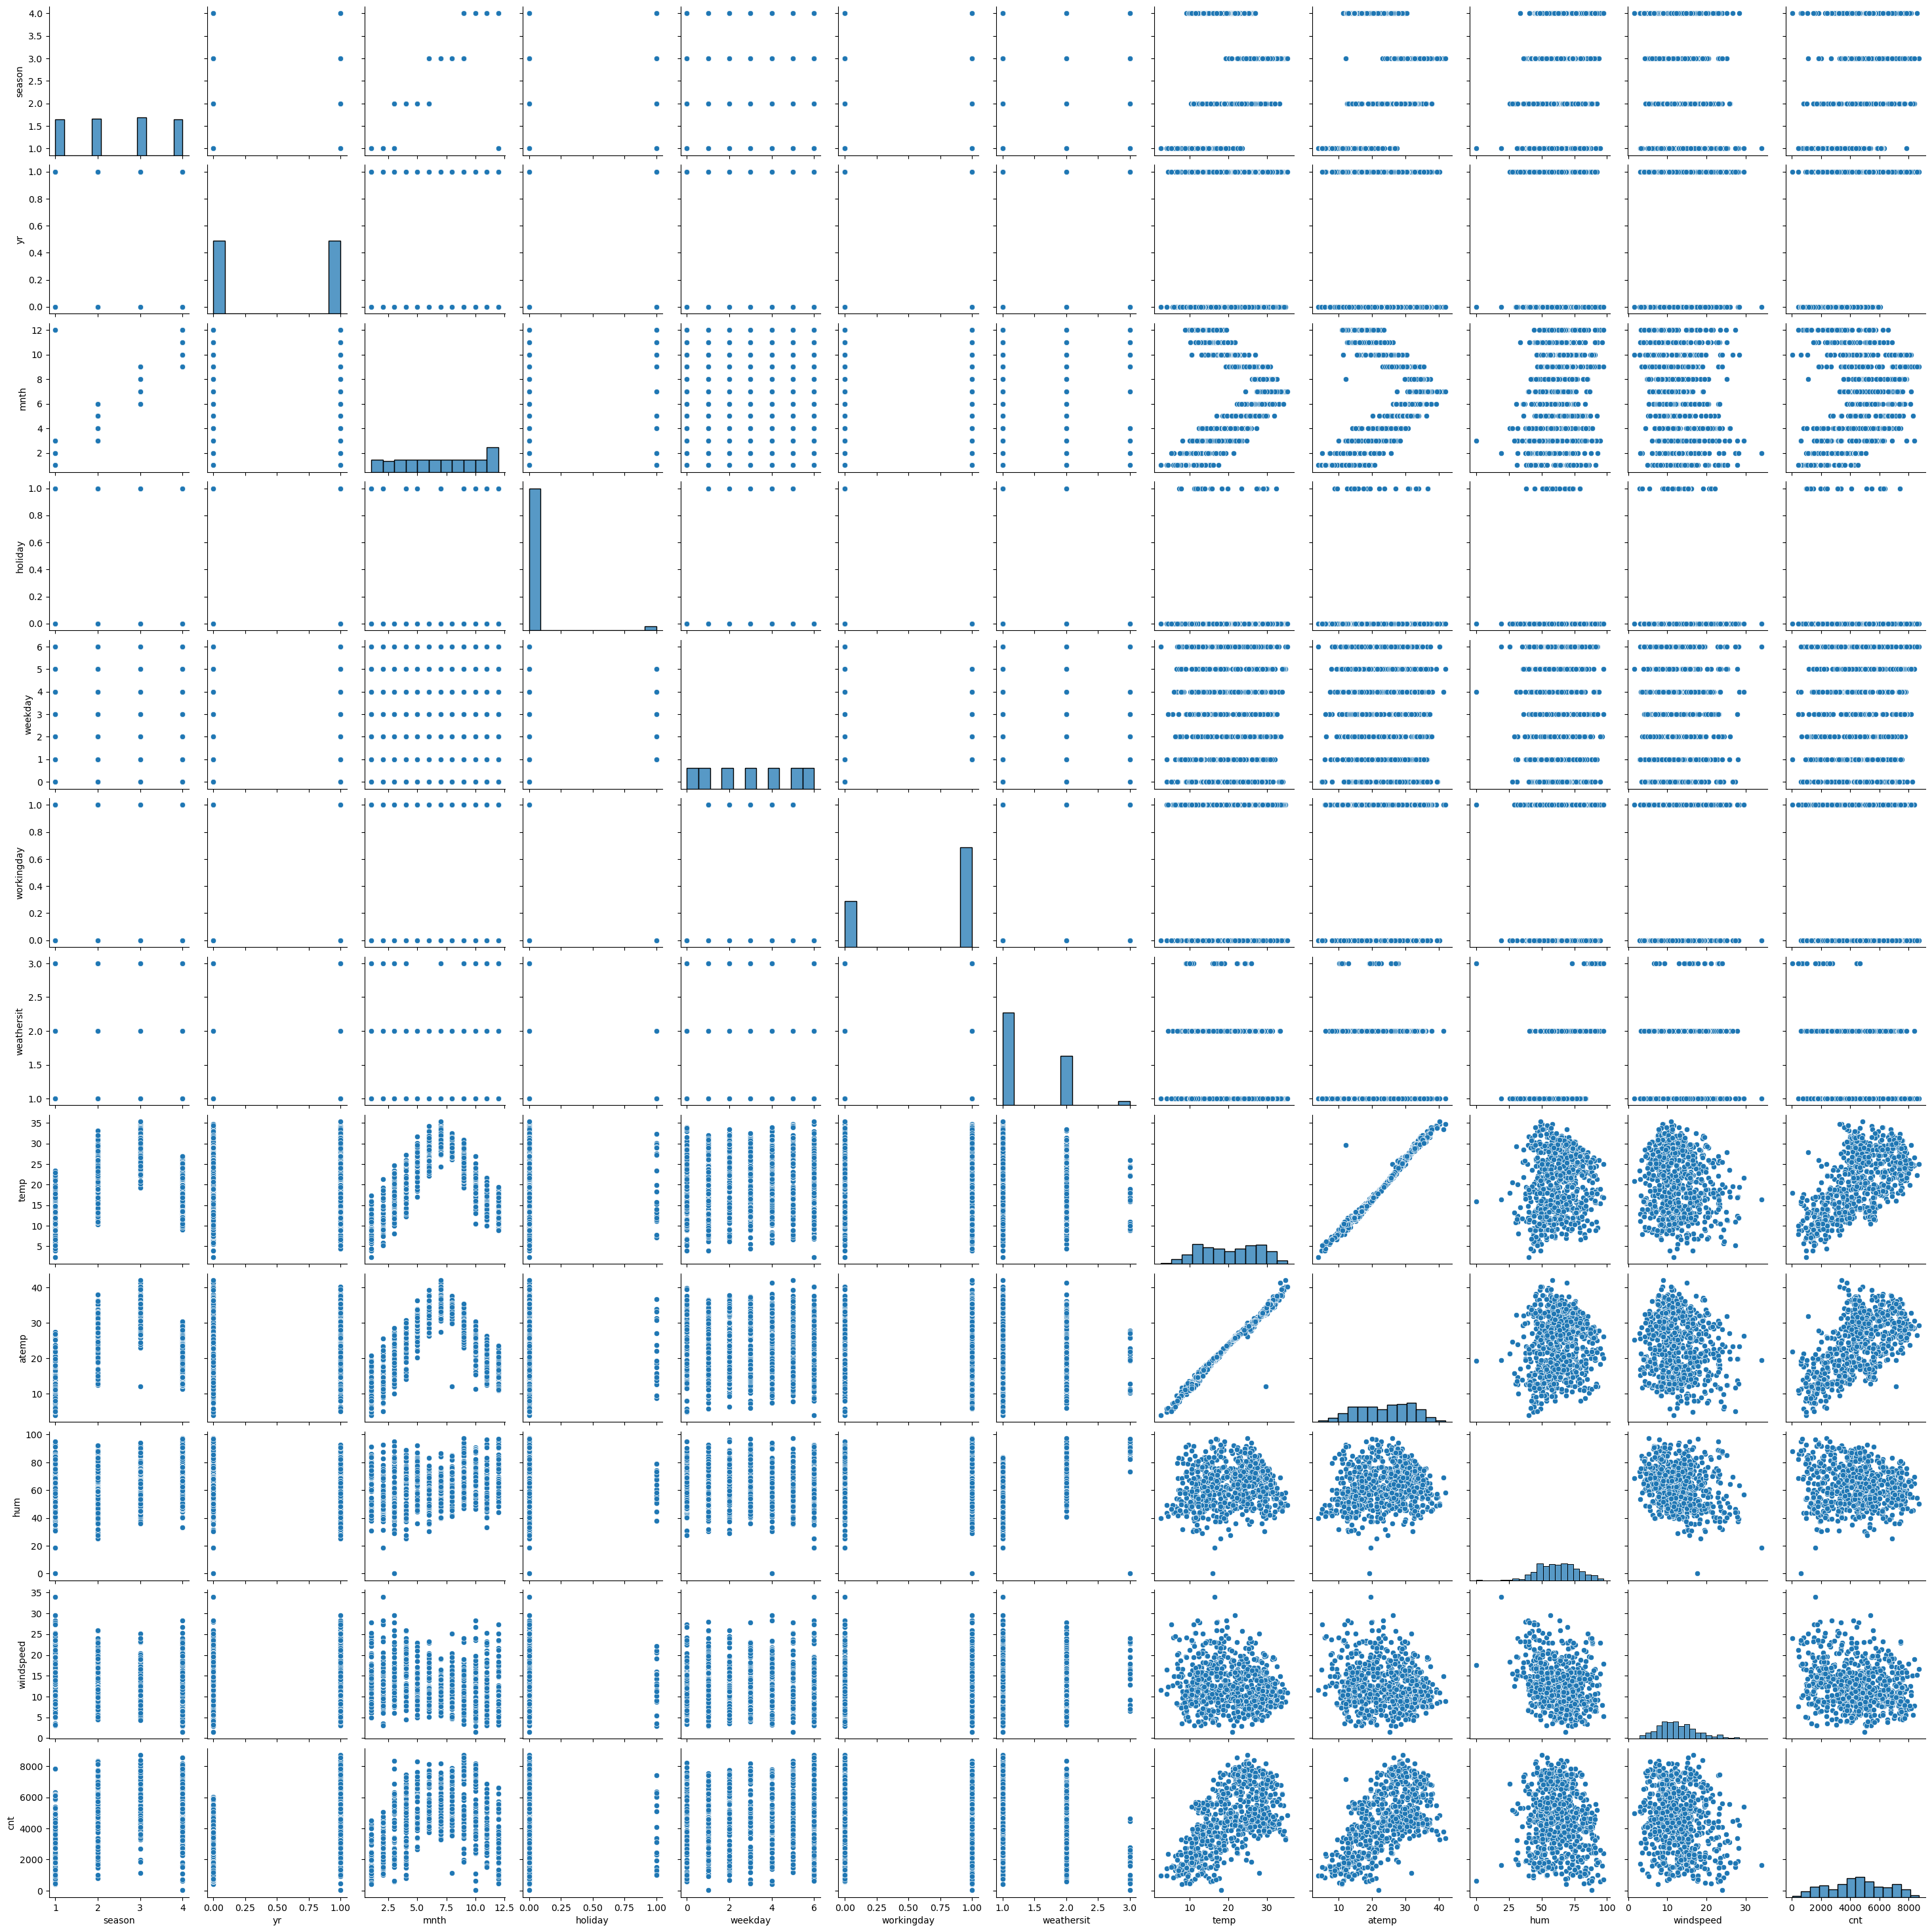

In [2]:
#now time to visualize data to see if linear regression models would work for numerical variables vs cnt (instant, temp, atemp, hum
#windspeed)
#instant vs cnt (total registered and casual users)  & hum vs cnt & windspeed vs cnt shows linear regression would not work as there is too much variance
#cnt vs temp and cnt vs atemp shows some linear regression so could use linear regression as there is a somewhat linear relationship

sns.pairplot(bike)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


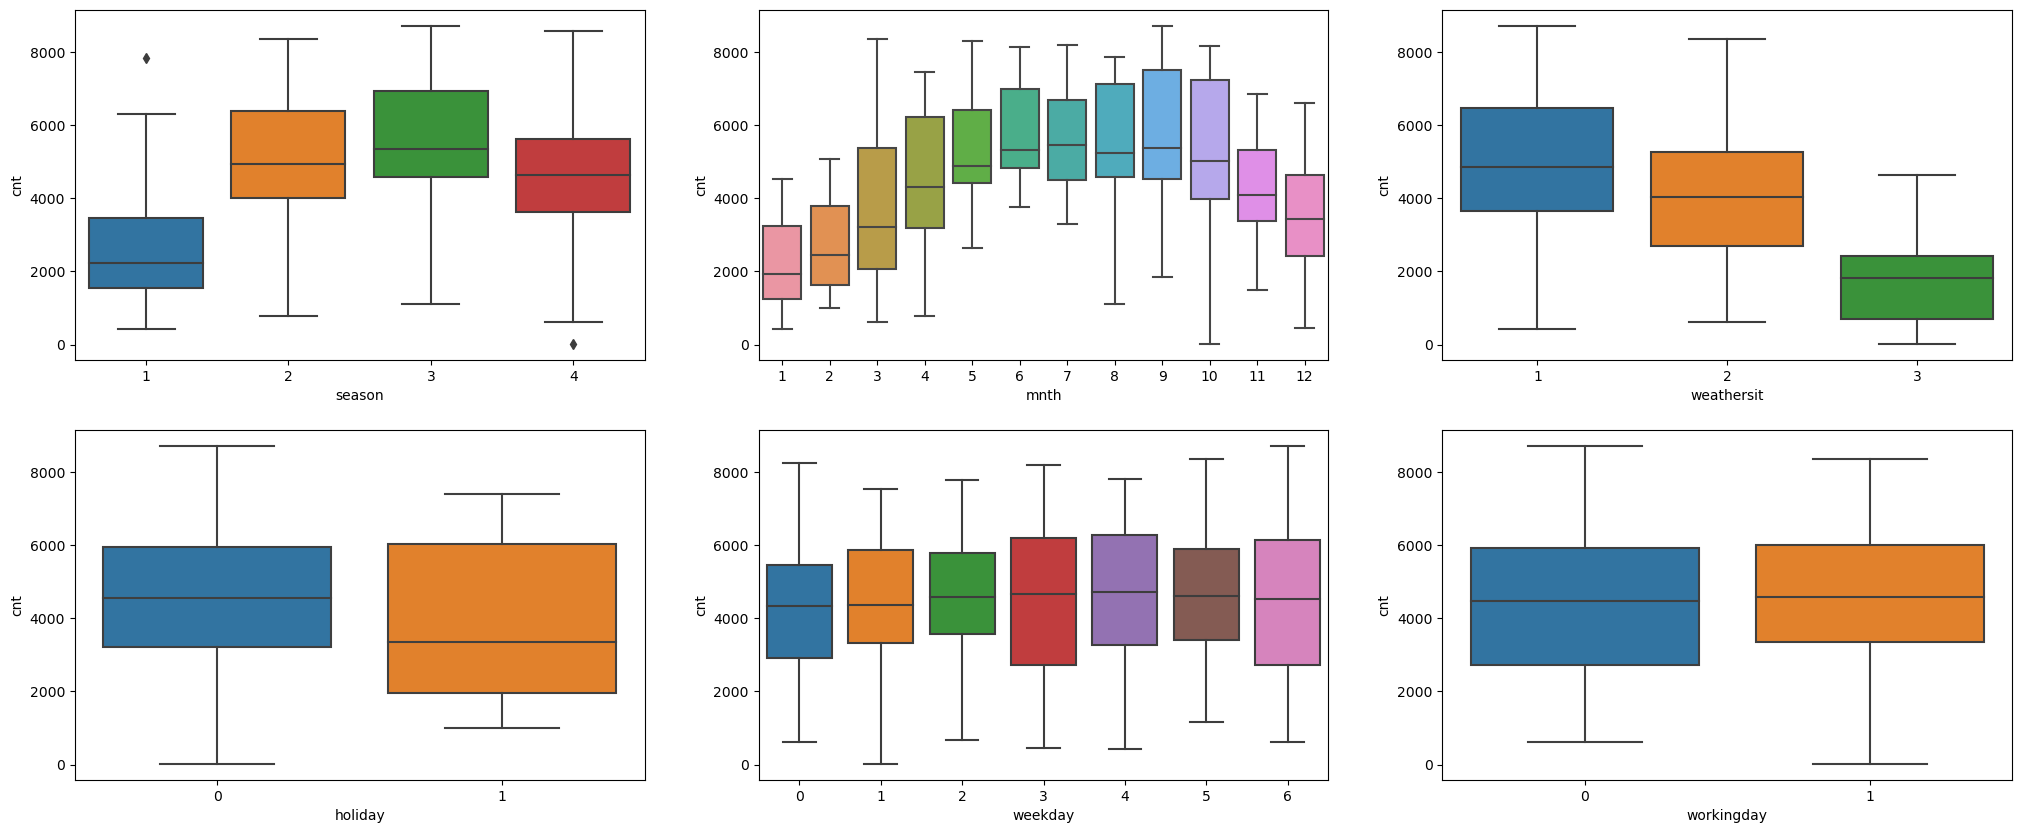

In [3]:

#Convert variables to category type
bike['mnth']=bike['mnth'].astype('category')
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['weekday']=bike['weekday'].astype('category')
bike.info()

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#from the above graphs we can infer that 
#season: there is a higher amount of bike rentals during summer and fall 
#it would be interesting to see if this did make a difference on cnt

#year: there is a higher amount of bike rentals during 2019
#it would be interesting to see if this did make a difference on cnt

#month: there is a higher amount of bike rentals during months 5-9
#it would be interesting to see if this did make a difference on cnt

#holiday: there is not a really big difference on bike rentals whether it is a holiday
#so would not want to use holiday

#weekday: there is not a really big difference on bike rentals on what day it is
#it would be interesting to see if this did make a difference on cnt

#workday: there is not really big difference on if it's a working day or not
#it would be interesting to see if this did make a difference on cnt

#weathersit: there is a difference if the weather type is clear and few clouds or there is Light Snow, Light Rain + Thunderstorm + Scattered 
#it would be interesting to see if this did make a difference on cnt

#so will be looking at season, year, month, weekday, workday, and weathersit



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

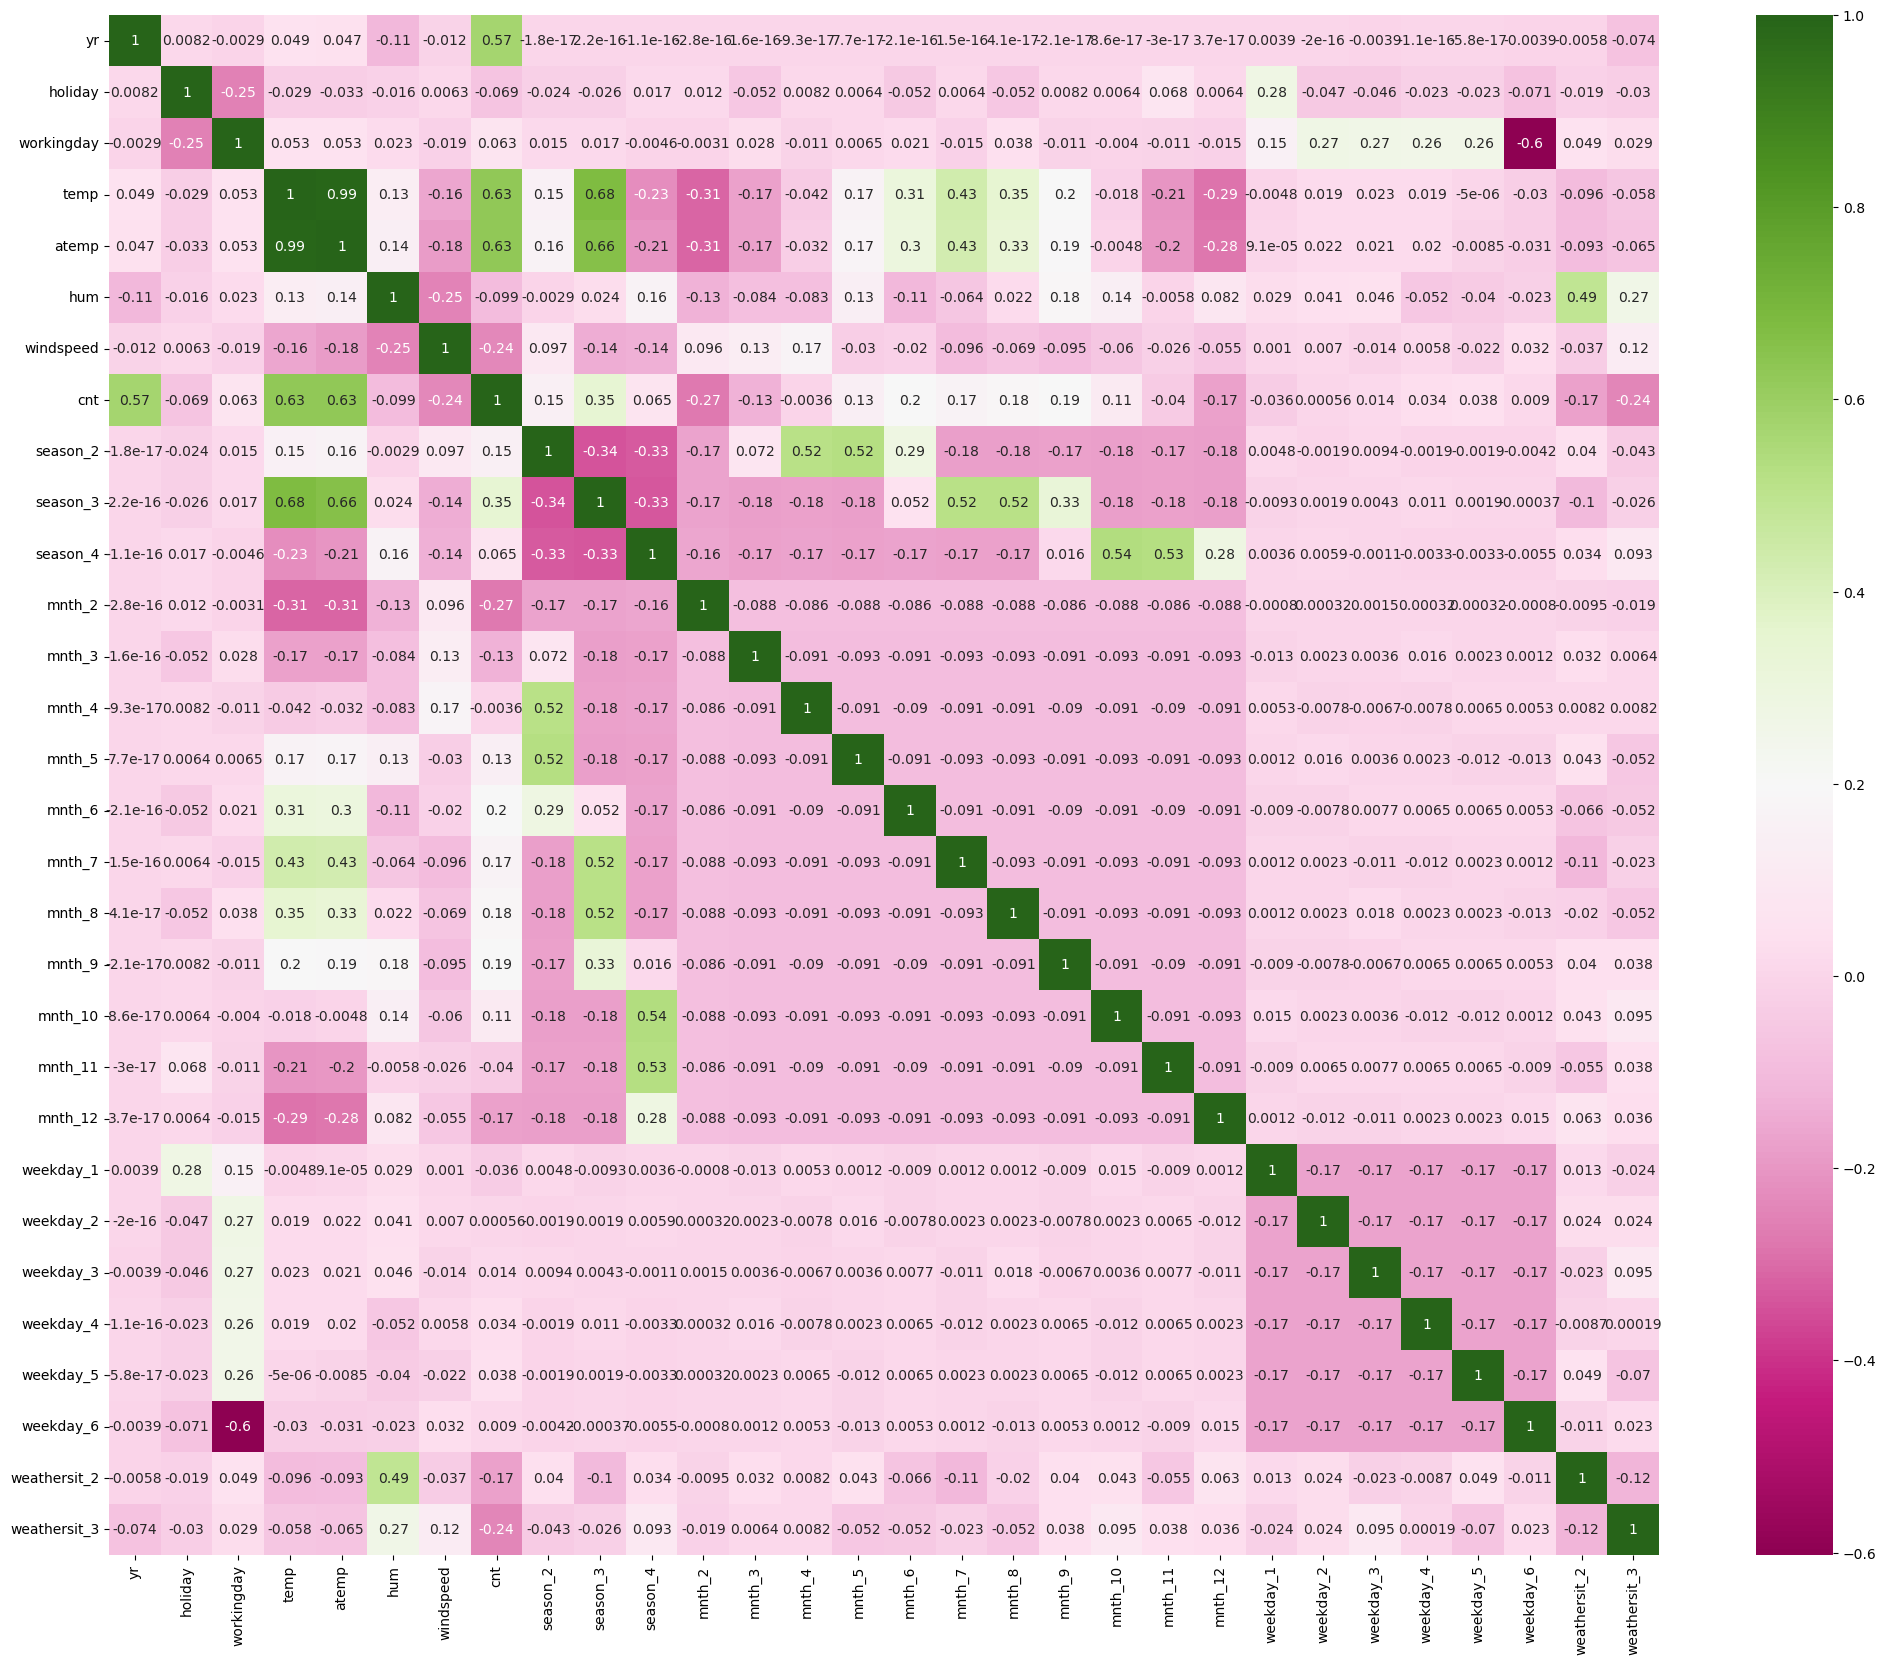

In [4]:
#from above heat map shows there is so much colinearity 
#so we need scale the data with VIF and p values so we can eliminate some variables

#let us create dummy variables for the categories
bike_dummy= pd.get_dummies(bike, drop_first=True)
bike_dummy.info()

#check shape
bike_dummy.shape
#now let us look at a heatmap
plt.figure(figsize = (25,20))
sns.heatmap(bike_dummy.corr(), annot = True, cmap="PiYG")
plt.show()


In [5]:
#now let us split the data
from sklearn.model_selection import train_test_split


num.random.seed(0)
df_train, df_test = train_test_split(bike_dummy, train_size = 0.70, test_size = 0.30, random_state = 100)

In [44]:
#see train info and shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   season_2      510 non-null    uint8  
 8   season_3      510 non-null    uint8  
 9   season_4      510 non-null    uint8  
 10  mnth_2        510 non-null    uint8  
 11  mnth_3        510 non-null    uint8  
 12  mnth_4        510 non-null    uint8  
 13  mnth_5        510 non-null    uint8  
 14  mnth_6        510 non-null    uint8  
 15  mnth_7        510 non-null    uint8  
 16  mnth_8        510 non-null    uint8  
 17  mnth_9        510 non-null    uint8  
 18  mnth_10       510 non-null   

(510, 29)

In [7]:
#now let's rescale the features to take out any extreme outliers
scaler = MinMaxScaler()
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [8]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#now let us divide into x and y sets
y_train = df_train.pop('cnt')
X_train = df_train

In [10]:
#run linear regression to find RFE
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=15)   
rfe = rfe.fit(X_train, y_train)

In [11]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 15),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [12]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
# now need to create x test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [13]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.94
3,temp,7.20
5,windspeed,3.58


In [14]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.params


const           0.257910
yr              0.227001
holiday        -0.067535
workingday      0.023560
temp            0.592570
hum            -0.279534
windspeed      -0.201605
season_2        0.088195
season_4        0.145931
mnth_9          0.103990
weekday_1      -0.017145
weekday_2      -0.015403
weekday_3      -0.003371
weekday_4      -0.006138
weekday_5      -0.001918
weathersit_3   -0.196851
dtype: float64

In [15]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          5.30e-181
Time:                        07:41:04   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.559   

In [16]:
#removing weekday__3 as high p-value and high VIF
X_train_new = X_train_rfe.drop(["weekday_3"], axis = 1)

In [17]:
#run model again
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.20
2,workingday,6.46
5,windspeed,3.58
9,weekday_1,2.08
0,yr,2.03
11,weekday_4,1.85
10,weekday_2,1.84
12,weekday_5,1.83
7,season_4,1.64


In [18]:
X_train_lr2 = sm.add_constant(X_train_new)

# create first model after removal of bad variable
lr2 = sm.OLS(y_train, X_train_lr2).fit()

# Check the parameters obtained

lr2.params



const           0.257910
yr              0.227001
holiday        -0.070905
workingday      0.020190
temp            0.592570
hum            -0.279534
windspeed      -0.201605
season_2        0.088195
season_4        0.145931
mnth_9          0.103990
weekday_1      -0.013775
weekday_2      -0.012032
weekday_4      -0.002768
weekday_5       0.001453
weathersit_3   -0.196851
dtype: float64

In [19]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          5.30e-181
Time:                        07:41:43   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.559   

In [20]:
#removing weekday_5 because really p value
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.20
2,workingday,4.50
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
9,weekday_1,1.64
6,season_2,1.58
11,weekday_4,1.47
10,weekday_2,1.46


In [21]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create another model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const           0.257945
yr              0.226990
holiday        -0.070198
workingday      0.020840
temp            0.592574
hum            -0.279559
windspeed      -0.201589
season_2        0.088154
season_4        0.145916
mnth_9          0.103954
weekday_1      -0.014429
weekday_2      -0.012683
weekday_4      -0.003415
weathersit_3   -0.197068
dtype: float64

In [22]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.80e-182
Time:                        07:42:59   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     496   BIC:                            -897.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.571   

In [23]:
#remove weekday_4 due to high p value
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.93
3,temp,7.20
2,workingday,3.73
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.46
10,weekday_2,1.32
1,holiday,1.23


In [25]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params



const           0.257699
yr              0.226992
holiday        -0.071561
workingday      0.019758
temp            0.592583
hum            -0.279180
windspeed      -0.201570
season_2        0.088192
season_4        0.145882
mnth_9          0.103884
weekday_1      -0.013316
weekday_2      -0.011609
weathersit_3   -0.197246
dtype: float64

In [26]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.69e-183
Time:                        07:43:39   Log-Likelihood:                 492.40
No. Observations:                 510   AIC:                            -958.8
Df Residuals:                     497   BIC:                            -903.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2577      0.027      9.577   

In [27]:
#removing weekday_1 due to high p value
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.92
3,temp,7.19
5,windspeed,3.58
2,workingday,3.36
0,yr,2.02
7,season_4,1.64
6,season_2,1.58
9,weekday_2,1.24
8,mnth_9,1.20
10,weathersit_3,1.09


In [28]:
X_train_lm5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params

const           0.258709
yr              0.226484
holiday        -0.081819
workingday      0.016537
temp            0.593039
hum            -0.280427
windspeed      -0.201800
season_2        0.087944
season_4        0.145501
mnth_9          0.104269
weekday_2      -0.008390
weathersit_3   -0.196594
dtype: float64

In [29]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.00e-184
Time:                        07:44:17   Log-Likelihood:                 491.85
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     498   BIC:                            -908.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2587      0.027      9.620   

In [30]:
#dropping hum due to high vif
X_train_new = X_train_new.drop(["hum"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.29
4,windspeed,3.15
2,workingday,3.09
0,yr,2.01
5,season_2,1.55
6,season_4,1.37
8,weekday_2,1.24
7,mnth_9,1.20
1,holiday,1.07
9,weathersit_3,1.06


In [31]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params

const           0.077248
yr              0.233235
holiday        -0.077624
workingday      0.015785
temp            0.568414
windspeed      -0.143492
season_2        0.079890
season_4        0.128222
mnth_9          0.088419
weekday_2      -0.009348
weathersit_3   -0.255837
dtype: float64

In [32]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.05e-169
Time:                        07:44:39   Log-Likelihood:                 454.64
No. Observations:                 510   AIC:                            -887.3
Df Residuals:                     499   BIC:                            -840.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0772      0.019      4.135   

In [33]:
#drop weekday_2 due to high p value
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.28
4,windspeed,3.15
2,workingday,2.87
0,yr,2.01
5,season_2,1.55
6,season_4,1.37
7,mnth_9,1.20
1,holiday,1.07
8,weathersit_3,1.06


In [34]:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train, X_train_lm7).fit()
lr7.params

const           0.077613
yr              0.233331
holiday        -0.077646
workingday      0.013963
temp            0.567858
windspeed      -0.143794
season_2        0.079846
season_4        0.128053
mnth_9          0.088615
weathersit_3   -0.255058
dtype: float64

In [35]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.54e-171
Time:                        07:44:59   Log-Likelihood:                 454.41
No. Observations:                 510   AIC:                            -888.8
Df Residuals:                     500   BIC:                            -846.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0776      0.019      4.159   

In [37]:
#removing workingday due to high p value
X_train_new = X_train_new.drop(["workingday"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.35
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


In [38]:
X_train_lm8 = sm.add_constant(X_train_new)
lr8 = sm.OLS(y_train, X_train_lm8).fit()
lr8.params

const           0.087179
yr              0.233667
holiday        -0.087091
temp            0.568657
windspeed      -0.145312
season_2        0.080175
season_4        0.127485
mnth_9          0.089117
weathersit_3   -0.254079
dtype: float64

In [39]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.42e-171
Time:                        07:46:14   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0872      0.017      5.001   

In [ ]:
#now we are good! there is low multicollinearity between the predictors and the p values are significant

#equation is cnt = 0.0872 + (yr x .2337) + (holiday x -.0871) + (temp x .5687) + (windspeed x -.1453)
#+ (season_2 x .0802) + (season_4 x .1275) + (mnth_9 x .0891) + (weathersit_3 x -.2541)


#year: a coefficient value of .2337 shows that a unit increase in yr variable, increases the cnt by .2337
#holiday: a coeff value of -.0871 indicates a unit decrease in holiday variable, decreases bike hire numbers by -.0871
#temp: a coeff value of .5687 indicates a unit increase in temp variable, increases bike hire numbers by .5687 units
#windspeed: a coeff value of -.1453 indicates a unit decrease in windspeed variable, decreases bike hire numbers by -.1453
#season_2:  a coeff value of .0802 indicates a unit increase in season_2 variable, increases bike hire numbers by .0802 units
#season_4:  a coeff value of .1275 indicates a unit increase in season_4 variable, increases bike hire numbers by .1275 units
#mnth_9: a coeff value of .0891 indicates a unit increase in mnth_9 variable, increases bike hire numbers by .0891 units
#weathersit_3: a coeff value of -.2541 indicates a unit decrease in weathersit variable, decreases bike hire numbers by -.2541

In [40]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

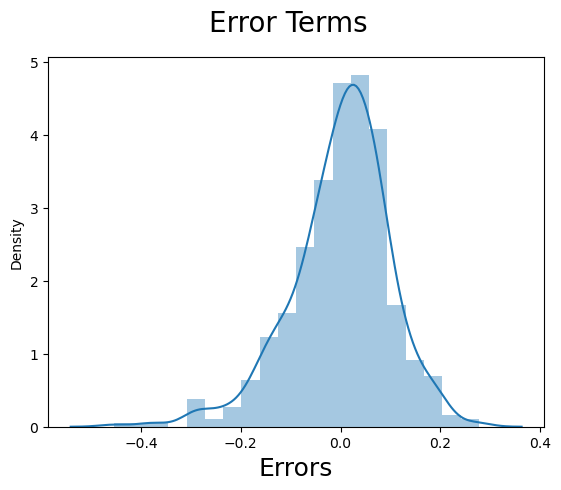

In [45]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                      



In [46]:
#From histogram we can see that the residuals are normally distributed bc highest value is centered around 0 
#now let us create a final model!!!
df_test.head()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [52]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.1 KB


In [53]:
y_pred = lr8.predict(X_test_lm8)

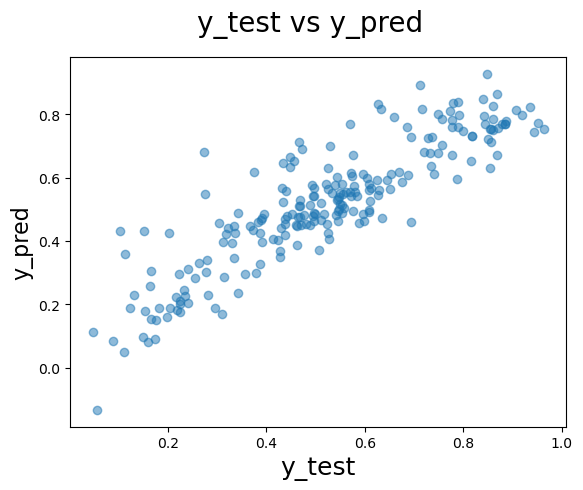

In [54]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7724376516730699

In [56]:
r2= 0.7724376516730699
X_test.shape

(219, 8)

In [57]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.763768609832044

In [ ]:
#adjusted_r2 value is .76 which isn't the best but isn't the worst either